In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import math

In [2]:
N=3
recursive = []
for l in range(2**(N+1)):
    for m in range(2):
        recursive.append(l)

In [1]:
def func(x):
    res = x*x
    return res

In [3]:
print(recursive)
val_arr = []
for l in range(N+1):
    val_arr.append([])
    val_arr[l] = [l-1 for m in range(2**l)]
val_arr

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]


[[-1], [0, 0], [1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2]]

In [4]:
def value(N, u, d, pi, default_x):
    val_arr = []
    recursive = []
    for l in range(2**(N+1)):
        for m in range(2):
            recursive.append(l)
    for l in range(N+1):
        val_arr.append([])
        val_arr[l] = [l-1 for m in range(2**l)]
        if l==0:
            val_arr[l][l]=default_x
        else:
            for n in range(len(val_arr[l])):
                if (n+1)%2!=0:
                    val_arr[l][n] = val_arr[l-1][recursive[n]]*(1+pi*(u-1))
                if (n+1)%2==0:
                    val_arr[l][n] = val_arr[l-1][recursive[n]]*(1+pi*(d-1))

    return val_arr[N]

In [29]:
def backward(N, theta, u, d, p, price_x, default_x):
    
    pi = (((p*(u-1))/((1-p)*(1-d)))**theta-1)/(u-1+(((p*(u-1))/((1-p)*(1-d)))**theta)*(1-d))


    num = [ i for i in range(N+1)]
    stock = [[ [] for i in range(N+1) ] for j in range(N+1)]
    
    #⇡リスト内包表記のほうが速いらしい         
    #for i in range(N+1):
    #    stock.append([])
    #    for j in range(0,N+1):
    #        stock[i].append([])
    M = p*(1+pi*(u-1))**(1-(1/theta))+(1-p)*(1+pi*(d-1))**(1-(1/theta))
    
    
    for i in range(N+1):
        for j in range(N+1):
            #index
            stock[i][0] = i
            #node_num
            stock[i][1] = num[0:i+1]
            #up_times
            stock[i][2] = num[i::-1]
            #down_times
            stock[i][3] = num[0:i+1]
            #theta
            stock[i][4] = theta
            #prob
            stock[i][5] = p
            #up_r
            stock[i][6] = list(map(lambda x: 0 if x==0 else u**x, num[0:i+1]))
            #down_r
            stock[i][7] = list(map(lambda x: 0 if x==0 else d**x, num[i::-1]))
            #price
            stock[i][8] = list(map(lambda x, y: price_x if x==0 and y==0 else (price_x*x)+(price_x*y) if x==0 or y==0 else (price_x*x*y), stock[i][6], stock[i][7]))
            #value
            
            #if i==N:
            #stock[i][9] = list(map(lambda x:((1-(1/theta))**(-1))*(x**(1-(1/theta))), stock[i][8]))
            #else:
            #stock[i][9] = list(map(lambda x: ((p*((1-(1/theta))**(-1))*((x*(1+pi*(u-1)))**(1-(1/theta)))+((1-p)*((1-(1/theta))**(-1)))*((x*(1+pi*(d-1)))**(1-(1/theta))))**(N-i))*(((1-(1/theta))**(-1))*(x**(1-(1/theta)))) , stock[i][8]))
            #stock[i][9] = list(map(lambda x: ((p*((1-(1/theta))**(-1))*((x*(1+pi*(u-1)))**(1-(1/theta)))+((1-p)*((1-(1/theta))**(-1)))*((x*(1+pi*(d-1)))**(1-(1/theta))))**(N-1-i-1)) , stock[i][8]))
            
            stock[i][9] = value(i, u, d, pi, default_x)

            #strategy
            #if i==0:
            #    stock[i][10] = 0
            #else:
            #    stock[i][10] = list(map(lambda x, y:(pi*y)/x, stock[i][8], stock[i][9])) 
            
            #stock[i][10] = list(map(lambda x: ((1-(1/theta))**(-1))*(x**(1-(1/theta))), stock[i][9]))
            
            #Wealth
            stock[i][10] = list(map(lambda x: (M**((10)-i))*((1-(1/theta))**(-1))*(x)**(1-(1/theta)), stock[i][9]))
            
            #Utility
            stock[i][11] = list(map(lambda x: (1-1/theta)**(-1)*x**(1-1/theta), stock[i][9]))
            #Exp_utility
            #stock[i][11] = list(map(lambda  l, m, n : (p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
            #                    else (p**l)*n if m==0 \
            #                    else ((1-p)**m)*n if l==0 \
            #                    else nan \
            stock[i][12] = list(map(lambda  l, m, n : ((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                , stock[i][2], stock[i][3], stock[i][11]))
            stock[i][13] = list(map(lambda  l, m, n : comb(i, l, exact=True)*(p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                , stock[i][2], stock[i][3], stock[i][10]))
    df = pd.DataFrame(stock)
    df = df.set_index(0)
    df.columns = ["node_num", "up_times", "down_times", "theta", "prob", "up_r", "down_r", "price", "value", "wealth", "utility", "Exp_utility", "Wn"]
    
    
    return df#df["Exp_utility"][10], df["wealth"][0], M

In [30]:
backward(13, 1.2, 1.2, 0.8, 0.4, 100, 500)

,node_num,up_times,down_times,theta,prob,up_r,down_r,price,value,wealth,utility,Exp_utility,Wn
0,,,,,,,,,,,,,
0,[0],[0],[0],1.2,0.4,[0],[0],[100],[500],[17.595191215478565],[16.903614683087042],[16.903614683087042],[17.595191215478565]
1,"[0, 1]","[1, 0]","[0, 1]",1.2,0.4,"[0, 1.2]","[0.8, 0]","[80.0, 120.0]","[380.7047188569014, 619.2952811430985]","[16.74643081230547, 18.161031484260622]","[16.15285496905992, 17.517315238195955]","[6.461141987623968, 10.510389142917573]","[6.698572324922188, 10.896618890556374]"
2,"[0, 1, 2]","[2, 1, 0]","[0, 1, 2]",1.2,0.4,"[0, 1.2, 1.44]","[0.6400000000000001, 0.8, 0]","[64.00000000000001, 96.0, 144.0]","[289.87216591982474, 471.5372717939781, 471.53...","[15.938613085638261, 17.28497596341694, 17.284...","[15.435439611182257, 16.73929853435394, 16.739...","[2.469670337789162, 10.043579120612362, 6.0261...","[2.5501780937021223, 8.296788462440132, 6.2225..."
3,"[0, 1, 2, 3]","[3, 2, 1, 0]","[0, 1, 2, 3]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998]","[0.5120000000000001, 0.6400000000000001, 0.8, 0]","[51.20000000000001, 76.80000000000001, 115.2, ...","[220.71140286189592, 359.0329289777535, 359.03...","[15.169763034342106, 16.451179786502358, 16.45...","[14.749887648147462, 15.995836782753534, 15.99...","[0.9439928094814378, 9.59750206965212, 5.75850...","[0.970864834197895, 4.73793977851268, 7.106909..."
4,"[0, 1, 2, 3, 4]","[4, 3, 2, 1, 0]","[0, 1, 2, 3, 4]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736]","[0.4096000000000001, 0.5120000000000001, 0.640...","[40.96000000000001, 61.44000000000001, 92.1600...","[168.0517451501008, 273.371060573691, 273.3710...","[14.438000927787566, 15.657604438711797, 15.65...","[14.094783894289707, 15.285395254489153, 15.28...","[0.36082646769381654, 9.171237152693491, 5.502...","[0.3696128237513618, 2.405008041786133, 5.4112..."
5,"[0, 1, 2, 3, 4, 5]","[5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736, 2.4...","[0.3276800000000001, 0.4096000000000001, 0.512...","[32.76800000000001, 49.15200000000001, 73.7280...","[127.95618478156155, 208.14730551864002, 208.1...","[13.741537710172615, 14.902309739530864, 14.90...","[13.468776018214616, 14.606507384338292, 14.60...","[0.1379202664265177, 8.763904430602974, 5.2583...","[0.1407133461521676, 1.1444973879959706, 3.433..."
6,"[0, 1, 2, 3, 4, 5, 6]","[6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736, 2.4...","[0.2621440000000001, 0.3276800000000001, 0.409...","[26.21440000000001, 39.32160000000001, 58.9824...","[97.42704670653224, 158.48532285659084, 158.48...","[13.078670626531935, 14.183449099266399, 14.18...","[12.870571751180089, 13.957771743329333, 13.95...","[0.052717861892833666, 8.3746630459976, 5.0247...","[0.053570234886274826, 0.5228586675953566, 1.9..."
7,"[0, 1, 2, 3, 4, 5, 6, 7]","[7, 6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6, 7]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736, 2.4...","[0.20971520000000007, 0.2621440000000001, 0.32...","[20.97152000000001, 31.45728000000001, 47.1859...","[74.18187285093713, 120.67222056212735, 120.67...","[12.447779059739638, 13.499265004393466, 13.49...","[12.298936219464522, 13.337849145770216, 13.33...","[0.02015057710197068, 8.002709487462129, 4.801...","[0.02039444121147743, 0.23223055572358176, 1.0..."
8,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[8, 7, 6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6, 7, 8]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736, 2.4...","[0.1677721600000001, 0.20971520000000007, 0.26...","[16.77721600000001, 25.165824000000008, 37.748...","[56.482778095988856, 91.88096760588539, 91.880...","[11.847320568327506, 12.848084720681054, 12.84...","[11.752689395215643, 12.745459884765918, 12.74...","[0.007702242522048528, 7.64727593085955, 4.588...","[0.007764260007659118, 0.10104144963054647, 0...."


In [28]:
x, y, z = backward(13, 1.2, 1.2, 0.8, 0.4, 100, 100)
print(sum(x))
#print(x)
print(y)
print(z)

13.58236391547801
[13.455473652141372]
1.004017865334002


In [20]:
x, y, z = backward(13, 1.2, 1.2, 0.8, 0.4, 100, 100)
print(np.sum(x))


1022.05922263


In [21]:
y[0]

13.455473652141372

In [34]:
math.pow(y[0]*(1-1/1.2), 1/(1-(1/1.2)))

127.19980299251482

In [19]:
theta_arr = []

for i in range(1, 11):
    theta_arr.append(500*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)),\
                          list(map(lambda x: sum(backward(12, 1.2, 1.2, 0.8, 0.4, 100, x)), theta_arr))]
#                          list(map(lambda x: math.pow((1-(1/1.2))*sum(backward(12, 1.2, 1.2, 0.8, 0.4, 100, x)), 1/(1-1/1.2)), theta_arr))]

In [20]:
last_u1_mean_over1

[[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
 [-0.4203370669447571,
  -0.471812405143166,
  -0.5047983173242482,
  -0.5295915186947698,
  -0.5496581732497682,
  -0.5666169532469004,
  -0.5813629658890139,
  -0.5944463808414029,
  -0.6062309541853522,
  -0.6169704390159232]]

In [22]:
theta_arr = []

for i in range(1, 11):
    theta_arr.append(500*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)),\
                          list(map(lambda x: sum(backward(12, 1.2, 1.2, 0.8, 0.4, 100, x)), theta_arr))]
#                          list(map(lambda x: math.pow((1-(1/1.2))*sum(backward(12, 1.2, 1.2, 0.8, 0.4, 100, x)), 1/(1-1/1.2)), theta_arr))]

In [23]:
last_u1_mean_over1

[[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
 [16.903614683087042,
  18.973665961010276,
  20.300175548974924,
  21.29721995853342,
  22.104188991842317,
  22.786176627742243,
  23.379179090327767,
  23.905321137950683,
  24.379231013324286,
  24.811113252000823]]

In [63]:
def f(u, d, p, theta, pi):
    return p*(1+pi*(u-1))**(1-(1/theta))+(p-1)*(1+pi*(d-1))**(1-(1/theta))

In [90]:
pi_lower = 1/(1-1.2)
f(1.2, 0.8, 0.4, 2, pi_lower)

-84.8528137423857

In [109]:
def drange(begin, end, step):
    n = begin
    while n+step < end:
     yield n
     n += step

In [119]:
pi_lower = 1/(1-1.2)
pi_upper = 1/(1-0.8)
#tmp = []
tmp = [f(1.2, 0.8, 0.4, 2, i) for i in drange(pi_lower, pi_upper+0.1, 0.1)]
tmp

[-0.848528137423857,
 -0.7877062942732935,
 -0.76,
 -0.7377237069197202,
 -0.7182473026432138,
 -0.7005518187186783,
 -0.6841144874426154,
 -0.6686246063481939,
 -0.6538795979750325,
 -0.6397386263091516,
 -0.6260990336999415,
 -0.6128832134546434,
 -0.6000307702626421,
 -0.5874935769526642,
 -0.5752325180310731,
 -0.5632152656222518,
 -0.5514147138292484,
 -0.5398078478096958,
 -0.5283749084919422,
 -0.5170987635627124,
 -0.5059644256269411,
 -0.4949586774622779,
 -0.48406977657937605,
 -0.4732872194344409,
 -0.4626015511452571,
 -0.4520042103603346,
 -0.44148740159866734,
 -0.43104398928169313,
 -0.42066740905808486,
 -0.4103515930342229,
 -0.40009090627536076,
 -0.3898800925077715,
 -0.3797142273814362,
 -0.36958867798197526,
 -0.3594990675351507,
 -0.3494412444458527,
 -0.33941125496954305,
 -0.32940531893760444,
 -0.31941980805634873,
 -0.30945122637812195,
 -0.29949619260623306,
 -0.28955142394651645,
 -0.2796137212596734,
 -0.2696799553020507,
 -0.25974705386962743,
 -0.24981198

In [114]:
pi_lower = 1/(1-1.2)
pi_upper = 1/(1-0.8)
print(pi_lower, pi_upper)

-5.000000000000001 5.000000000000001


In [96]:
value(4)

TypeError: value() missing 4 required positional arguments: 'u', 'd', 'pi', and 'default_x'

In [27]:
backward(12, 1.2, 1.2, 0.8, 0.4, 100, 100)

,node_num,up_times,down_times,theta,prob,up_r,down_r,price,value,wealth,utility,Exp_val
0,,,,,,,,,,,,
0,[0],[0],[0],1.2,0.4,[0],[0],[100],[100],[3.685483287510311e-09],[12.926608140191302],[12.926608140191302]
1,"[0, 1]","[1, 0]","[0, 1]",1.2,0.4,"[0, 1.2]","[0.8, 0]","[80.0, 120.0]","[76.1409437713803, 123.8590562286197]","[-1.4701764241835145e-08, -1.594364830707395e-08]","[12.352483799769557, 13.395919985026966]","[4.940993519907823, 8.03755199101618]"
2,"[0, 1, 2]","[2, 1, 0]","[0, 1, 2]",1.2,0.4,"[0, 1.2, 1.44]","[0.6400000000000001, 0.8, 0]","[64.00000000000001, 96.0, 144.0]","[57.97443318396495, 94.30745435879562, 94.3074...","[5.864681914444793e-08, 6.360081983269053e-08,...","[11.80385870514299, 12.80095155693379, 12.8009...","[1.8886173928228787, 6.144456747328219, 4.6083..."
3,"[0, 1, 2, 3]","[3, 2, 1, 0]","[0, 1, 2, 3]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998]","[0.5120000000000001, 0.6400000000000001, 0.8, 0]","[51.20000000000001, 76.80000000000001, 115.2, ...","[44.142280572379185, 71.8065857955507, 71.8065...","[-2.339480717541594e-07, -2.537100797435195e-0...","[11.279600328929735, 12.232408147116574, 12.23...","[0.7218944210515033, 3.5229335463695737, 5.284..."
4,"[0, 1, 2, 3, 4]","[4, 3, 2, 1, 0]","[0, 1, 2, 3, 4]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736]","[0.4096000000000001, 0.5120000000000001, 0.640...","[40.96000000000001, 61.44000000000001, 92.1600...","[33.61034903002016, 54.674212114738204, 54.674...","[9.332424345587161e-07, 1.012075075962743e-06,...","[10.778626443991357, 11.689116110793659, 11.68...","[0.27593283696617876, 1.7954482346179066, 4.03..."
5,"[0, 1, 2, 3, 4, 5]","[5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736, 2.4...","[0.3276800000000001, 0.4096000000000001, 0.512...","[32.76800000000001, 49.15200000000001, 73.7280...","[25.59123695631231, 41.629461103728005, 41.629...","[-3.7227981198164976e-06, -4.03726947080886e-0...","[10.299902889390177, 11.169953929621258, 11.16...","[0.10547100558735543, 0.8578524617949128, 2.57..."
6,"[0, 1, 2, 3, 4, 5, 6]","[6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736, 2.4...","[0.2621440000000001, 0.3276800000000001, 0.409...","[26.21440000000001, 39.32160000000001, 58.9824...","[19.48540934130645, 31.697064571318172, 31.697...","[1.4850616868340956e-05, 1.6105074778588136e-0...","[9.842441435569727, 10.67384989654192, 10.6738...","[0.040314640120093614, 0.39348080258612145, 1...."
7,"[0, 1, 2, 3, 4, 5, 6, 7]","[7, 6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6, 7]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736, 2.4...","[0.20971520000000007, 0.2621440000000001, 0.32...","[20.97152000000001, 31.45728000000001, 47.1859...","[14.836374570187427, 24.134444112425474, 24.13...","[-5.924060727233948e-05, -6.424476629546125e-0...","[9.405297744351397, 10.199779903458479, 10.199...","[0.015409639824345334, 0.17546885363517697, 0...."
8,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[8, 7, 6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6, 7, 8]",1.2,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736, 2.4...","[0.1677721600000001, 0.20971520000000007, 0.26...","[16.77721600000001, 25.165824000000008, 37.748...","[11.296555619197772, 18.37619352117708, 18.376...","[0.00023631675243586164, 0.0002562788470778069...","[8.9875694195361, 9.746765327166587, 9.7467653...","[0.005890093494787182, 0.07665168149774276, 0...."


### theta

In [7]:
import matplotlib.pyplot as plt
#def plt_theta_u (u):
theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: backward(11, x, 1.2, 0.8, 0.4), theta_arr))]

theta_arr = []
for i in range(1, 10):
    theta_arr.append(0.1*i)

for i in range(1, 10):
    last_u1_mean_under1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: backward(11, x, 1.2, 0.8, 0.4), theta_arr))]

df_over = pd.DataFrame(last_u1_mean_over1).T
df_over.columns = ["theta", "last_u1_mean"]

df_under = pd.DataFrame(last_u1_mean_under1).T
df_under.columns = ["theta", "last_u1_mean"]

x = df_over["theta"]
y = df_over["last_u1_mean"]

plt.scatter(x, y, linewidth=0.1)
    
plt.title("Backward")
plt.xlabel("theta")
plt.ylabel("last_u1_mean")

TypeError: backward() missing 2 required positional arguments: 'price_x' and 'value_x'

In [16]:
theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: backward(11, x, 1.2, 0.8, 0.4), theta_arr))]

df_over1 = pd.DataFrame(last_u1_mean_over1).T
df_over1.columns = ["theta", "last_u1_mean"]

x = df_over["theta"]
y = df_over["last_u1_mean"]

theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: backward(11, x, 1.5, 0.8, 0.4), theta_arr))]

df_over1 = pd.DataFrame(last_u1_mean_over1).T
df_over1.columns = ["theta", "last_u1_mean"]

x_1 = df_over1["theta"]
y_1 = df_over1["last_u1_mean"]

theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: backward(11, x, 1.8, 0.8, 0.4), theta_arr))]

df_over1 = pd.DataFrame(last_u1_mean_over1).T
df_over1.columns = ["theta", "last_u1_mean"]

x_2 = df_over1["theta"]
y_2 = df_over1["last_u1_mean"]

plt.plot(x, y, label ="u=1.2")
plt.plot(x_1, y_1, label = "u=1.5")
plt.plot(x_2, y_2, label = "u=1.8")
plt.title("Backward")
plt.xlabel("theta")
plt.ylabel("last_u1_mean")
plt.legend()
plt.show()

TypeError: backward() missing 2 required positional arguments: 'price_x' and 'value_x'

In [17]:
import matplotlib.pyplot as plt
default_arr =[]
for i in range(1, 101):
    default_arr.append(100*i)
    tmp = list(map(lambda x: np.max(backward(11, 3, 1.2, 0.8, 0.4, x)), default_arr))

df = pd.DataFrame([default_arr, tmp]).T
df.columns = ["default_x", "max_Exp_U1"]

df_x = df["default_x"]
df_y = df["max_Exp_U1"]

plt.figure(figsize=(20,10))
plt.plot(df_x, df_y, label = "backward", alpha=0.5)

plt.title("Backward")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

TypeError: backward() missing 1 required positional argument: 'value_x'

In [18]:
import matplotlib.pyplot as plt
default_arr =[]
for i in range(1, 101):
    default_arr.append(100*i)
    tmp = list(map(lambda x: np.max(backward(11, 2, 1.2, 0.8, 0.4, x)), default_arr))

df = pd.DataFrame([default_arr, tmp]).T
df.columns = ["default_x", "max_Exp_U1"]

df_x = df["default_x"]
df_y = df["max_Exp_U1"]

plt.figure(figsize=(20,10))
plt.plot(df_x, df_y, label = "backward", alpha=0.5)

plt.title("Backward")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

TypeError: backward() missing 1 required positional argument: 'value_x'

In [19]:
import matplotlib.pyplot as plt
default_arr =[]
for i in range(1, 11):
    default_arr.append(100*i)
    tmp = list(map(lambda x: np.max(backward(11, 3, 1.2, 0.8, 0.4, x)), default_arr))

df = pd.DataFrame([default_arr, tmp]).T
df.columns = ["default_x", "max_Exp_U1"]

df_x = df["default_x"]
df_y = df["max_Exp_U1"]

plt.figure(figsize=(20,10))
plt.plot(df_x, df_y, label = "backward", alpha=0.5)

plt.title("Backward")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

TypeError: backward() missing 1 required positional argument: 'value_x'

### 初期値

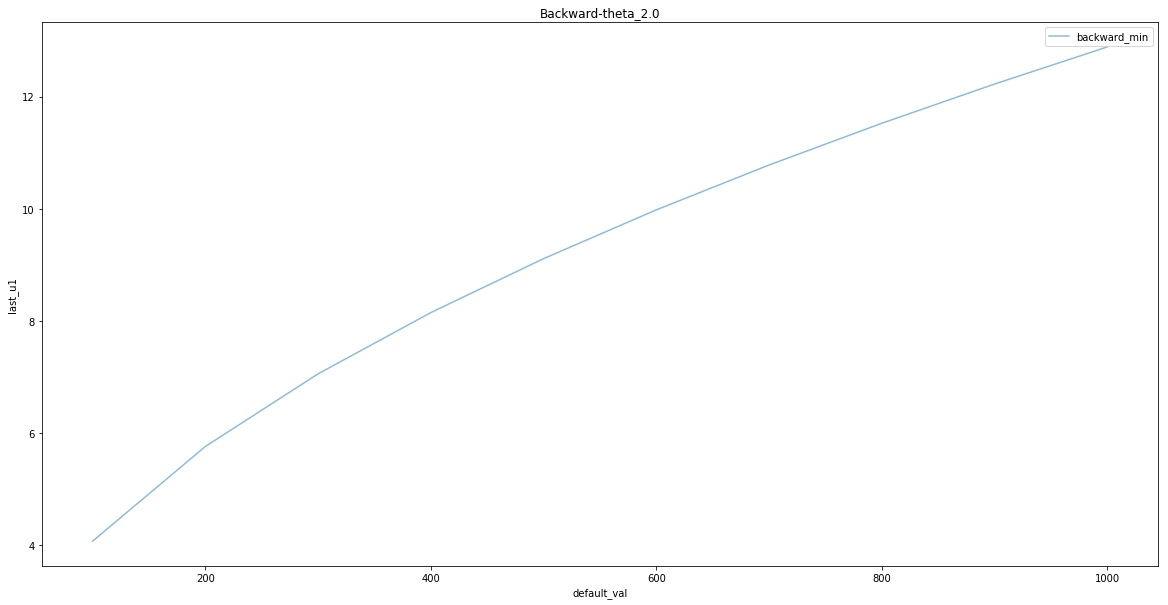

In [55]:
theta_arr = []

for i in range(1, 11):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: sum(backward(12, 2, 1.2, 0.8, 0.4, 100, x)), theta_arr))]

df_min_bk = pd.DataFrame(last_u1_mean_over1).T
df_min_bk.columns = ["theta", "min"]

bk_min_x = df_min_bk["theta"]
bk_min_y = df_min_bk["min"]

plt.figure(figsize=(20,10))
plt.plot(bk_min_x, bk_min_y, label = "backward_min", alpha=0.5)
plt.title("Backward-theta_2.0")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

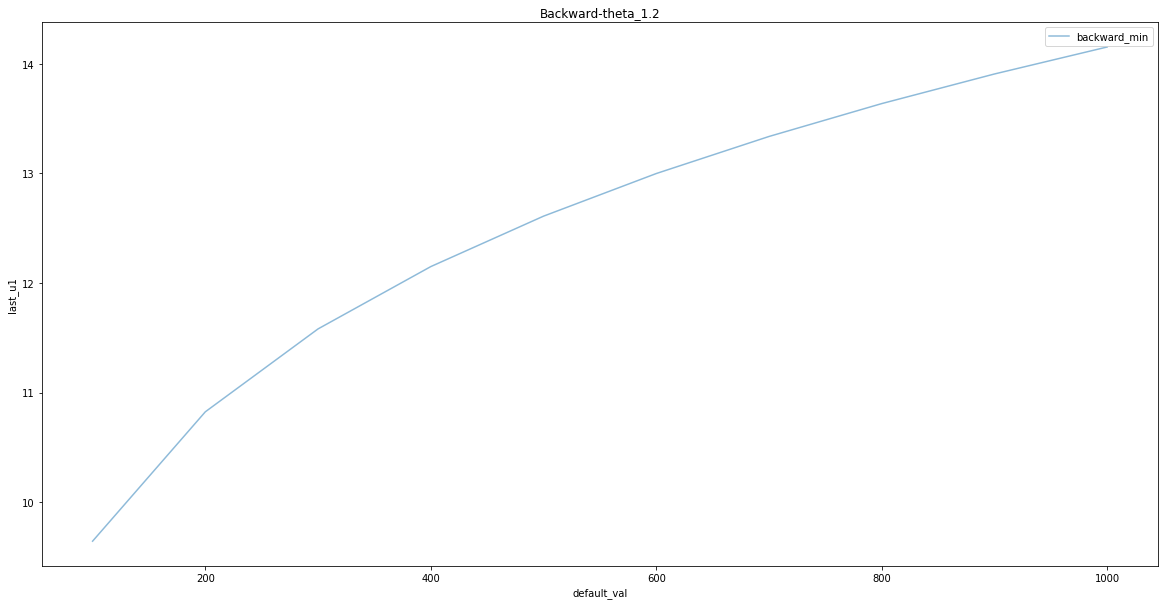

In [53]:
theta_arr = []

for i in range(1, 11):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: sum(backward(12, 1.2, 1.2, 0.8, 0.4, 100, x)), theta_arr))]

df_min_bk = pd.DataFrame(last_u1_mean_over1).T
df_min_bk.columns = ["theta", "min"]

bk_min_x = df_min_bk["theta"]
bk_min_y = df_min_bk["min"]

plt.figure(figsize=(20,10))
plt.plot(bk_min_x, bk_min_y, label = "backward_min", alpha=0.5)
plt.title("Backward-theta_1.2")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

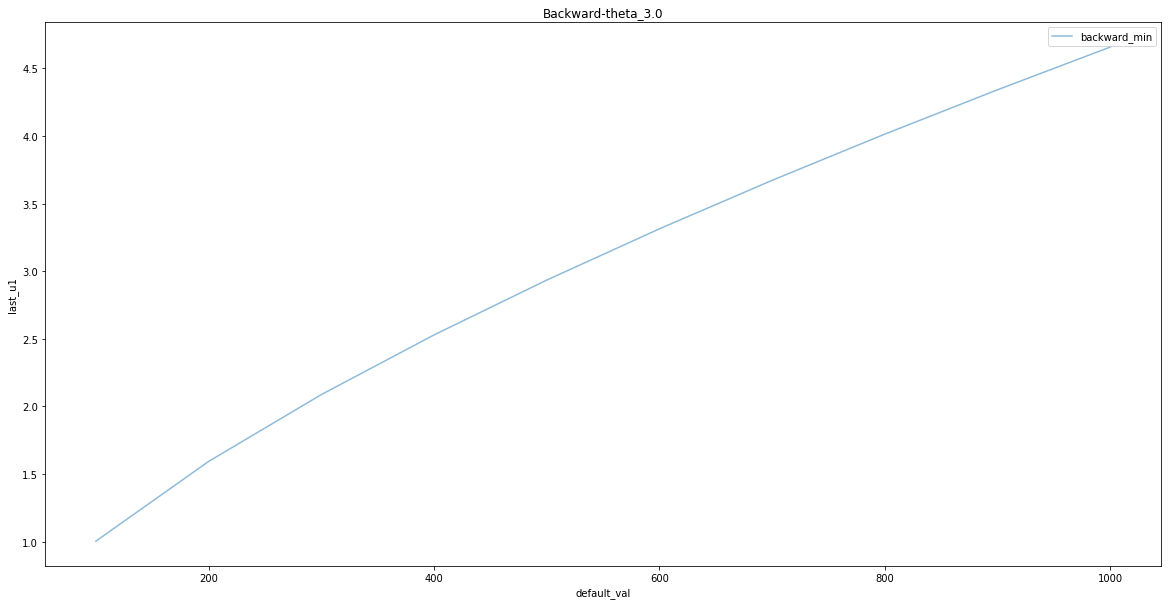

In [56]:
theta_arr = []

for i in range(1, 11):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: sum(backward(12, 3, 1.2, 0.8, 0.4, 100, x)), theta_arr))]

df_min_bk = pd.DataFrame(last_u1_mean_over1).T
df_min_bk.columns = ["theta", "min"]

bk_min_x = df_min_bk["theta"]
bk_min_y = df_min_bk["min"]

plt.figure(figsize=(20,10))
plt.plot(bk_min_x, bk_min_y, label = "backward_min", alpha=0.5)
plt.title("Backward-theta_3.0")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

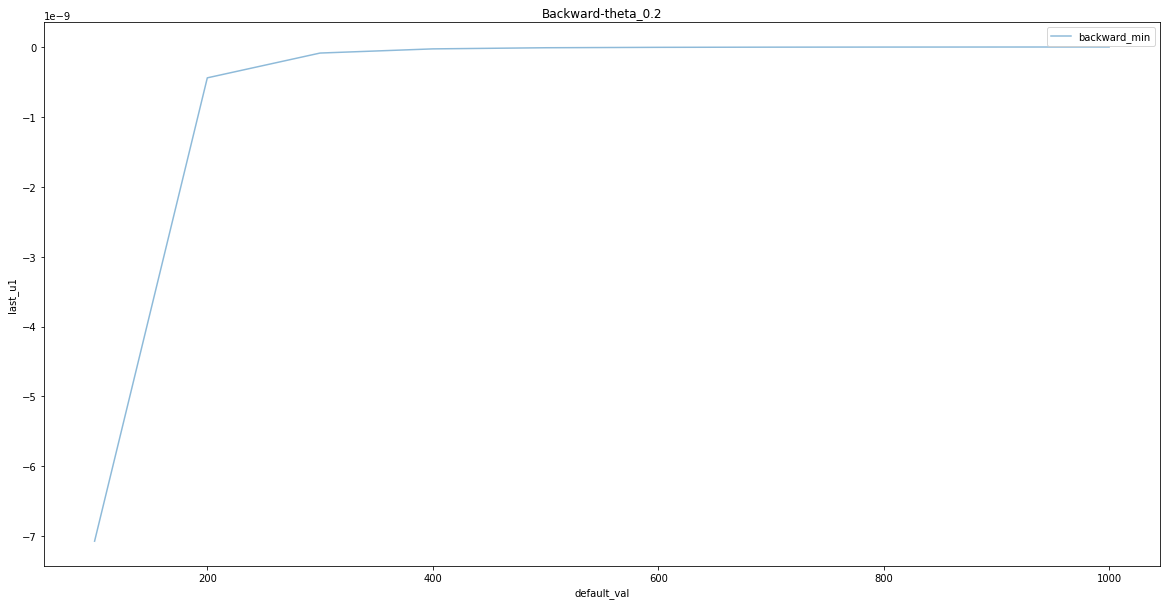

In [22]:
theta_arr = []

for i in range(1, 11):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: sum(backward(12, 0.2, 1.2, 0.8, 0.4, 100, x)), theta_arr))]

df_min_bk = pd.DataFrame(last_u1_mean_over1).T
df_min_bk.columns = ["theta", "min"]

bk_min_x = df_min_bk["theta"]
bk_min_y = df_min_bk["min"]

plt.figure(figsize=(20,10))
plt.plot(bk_min_x, bk_min_y, label = "backward_min", alpha=0.5)
plt.title("Backward-theta_0.2")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

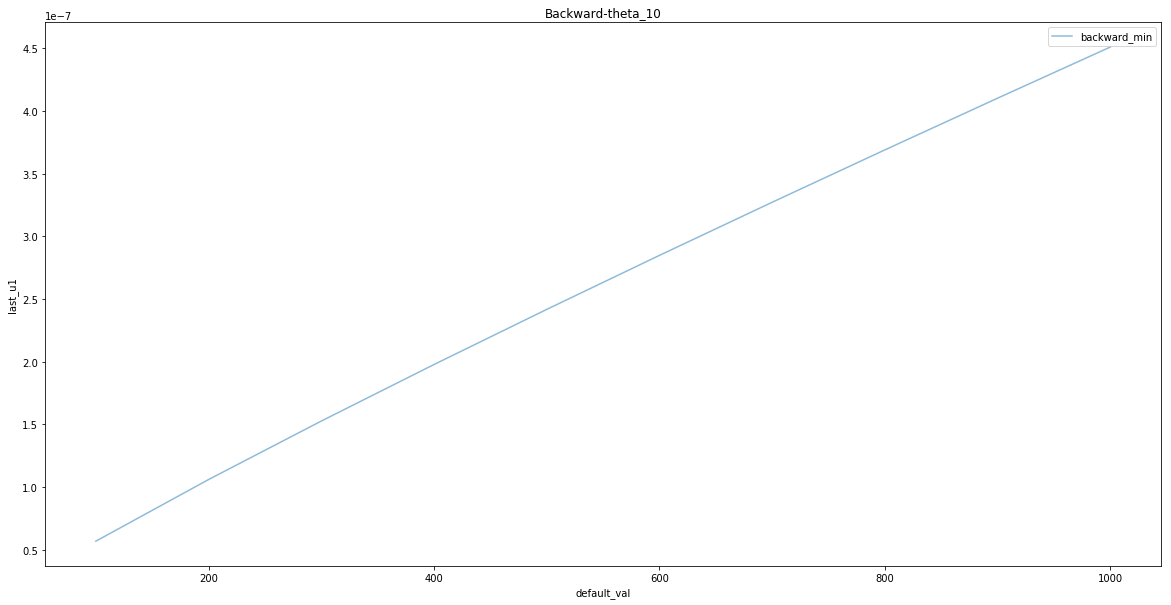

In [57]:
theta_arr = []

for i in range(1, 11):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: sum(backward(12, 10, 1.2, 0.8, 0.4, 100, x)), theta_arr))]

df_min_bk = pd.DataFrame(last_u1_mean_over1).T
df_min_bk.columns = ["theta", "min"]

bk_min_x = df_min_bk["theta"]
bk_min_y = df_min_bk["min"]

plt.figure(figsize=(20,10))
plt.plot(bk_min_x, bk_min_y, label = "backward_min", alpha=0.5)
plt.title("Backward-theta_10")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

In [21]:
from Backward import backward

theta_arr = []

for i in range(1, 101):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: sum(backward(11, 2, 1.2, 0.8, 0.4, x)), theta_arr))]

df_min_fw = pd.DataFrame(last_u1_mean_over1).T
df_min_fw.columns = ["theta", "min"]
"""
theta_arr = []

for i in range(1, 101):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: max(forward(12, 1.2, 1.2, 0.8, 0.4, x)), theta_arr))]

df_max_fw = pd.DataFrame(last_u1_mean_over1).T
df_max_fw.columns = ["theta", "max"]
"""
fw_min_x = df_min_fw["theta"]
fw_min_y = df_min_fw["min"]

#fw_max_x = df_max_fw["theta"]
#fw_max_y = df_max_fw["max"]

theta_arr = []

for i in range(1, 101):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: sum(backward(11, 2, 1.2, 0.8, 0.4, x)), theta_arr))]

df_min_bk = pd.DataFrame(last_u1_mean_over1).T
df_min_bk.columns = ["theta", "min"]
"""
theta_arr = []

for i in range(1, 101):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: max(backward(11, 1.2, 1.2, 0.8, 0.4, x)), theta_arr))]

df_max_bk = pd.DataFrame(last_u1_mean_over1).T
df_max_bk.columns = ["theta", "max"]
"""
bk_min_x = df_min_bk["theta"]
bk_min_y = df_min_bk["min"]

#bk_max_x = df_max_bk["theta"]
#bk_max_y = df_max_bk["max"]

#fig, axs = plt.subplots(2, 1, figsize=(10, 10))
#axs[0].(fw_x, fw_y)
#axs[1].scatter(bk_x, bk_y)
plt.figure(figsize=(20,10))
plt.plot(fw_min_x, fw_min_y, label = "forward_min", alpha=0.5)
#plt.plot(fw_max_x, fw_max_y, label = "forward_max", alpha=0.5)
plt.plot(bk_min_x, bk_min_y, label = "backward_min", alpha=0.5)
#plt.plot(bk_max_x, bk_max_y, label = "backward_max", alpha=0.5)
#axs[1, 0].scatter(data[0], data[1])
#axs[0, 1].plot(data[0], data[1])
#axs[1, 1].hist2d(data[0], data[1])

#plt.scatter(x, y, linewidth=0.1)
plt.title("Forward")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

KeyboardInterrupt: 